In [1]:
# 사용할 모델 불러오기
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
data = pd.read_csv('./Final_data_fix.csv')

print(data.shape)

(1567, 373)


## Under-Sampling

 - Pass/Fail 데이터 분리

In [3]:
failed_tests = np.array(data[data['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [4]:
normal_indices = data[data['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [5]:
# Pass 데이터에서 무작위로 104개 추출
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [6]:
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [7]:
undersample_data = data.iloc[under_sample, :]

In [8]:
x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 372)
(208, 1)


In [9]:
# train, test 분리
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(145, 372)
(145, 1)
(63, 372)
(63, 1)


In [10]:
# 표준화
sc = StandardScaler()
x_train_us = sc.fit_transform(x_train_us)
x_test_us = sc.transform(x_test_us)

## Logistic regression(UnderSampling)

In [11]:
# LogisticRegression 모델 적용
lr = LogisticRegression(random_state=1)
lr.fit(x_train_us, y_train_us) 

print("Accuracy: ", lr.score(x_test_us,y_test_us)*100)

Accuracy:  66.66666666666666


c:\python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
y_pred = lr.predict(x_test_us)

<Axes: >

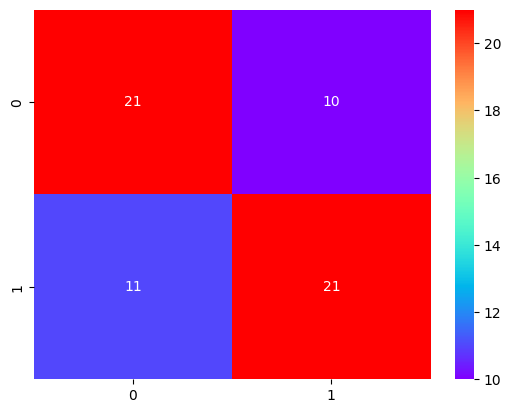

In [13]:
# 혼동행렬 시각화
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

# Over-Sampling

In [14]:
# SMOTE 를 이용한 오버샘플링
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(208, 372)
(208,)


In [15]:
# train, test 모델 분리
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_os.shape)
print(y_train_os.shape)
print(x_test_os.shape)
print(y_test_os.shape)

(145, 372)
(145, 1)
(63, 372)
(63, 1)


In [16]:
# 표준화
sc = StandardScaler()
x_train_os = sc.fit_transform(x_train_os)
x_test_os = sc.transform(x_test_os)

## Logistic regression(OverSampling)

In [17]:
# LogisticRegression 모델 적용
lr = LogisticRegression(random_state=1)
lr.fit(x_train_os, y_train_os) 
y_pred_os = lr.predict(x_test_os)

print("Accuracy: ", lr.score(x_test_os,y_test_os)*100)

Accuracy:  66.66666666666666


c:\python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

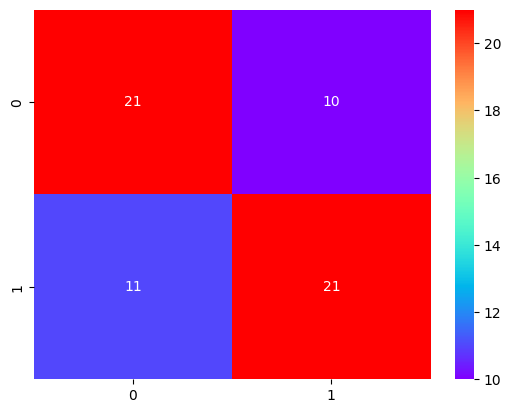

In [18]:
# 혼동행렬 시각화
CM = confusion_matrix(y_test_os, y_pred_os)
sns.heatmap(CM, annot = True, cmap = 'rainbow')